<a href="https://colab.research.google.com/github/akybharat/EDA/blob/main/networth_corp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [51]:
description_df = pd.read_excel('Customer Raw data.xlsx', sheet_name='Product Description')

In [52]:
performance_df = pd.read_excel('Customer Raw data.xlsx', sheet_name='Product Performance')

In [53]:
unbxd_query_performance_df = pd.read_excel('Customer Raw data.xlsx', sheet_name='Unbxd Query performance')

### Performing clustering on Product performance sheet

#### Objective: To form different clusters so that different strategies can be applied based on clusters.

In [34]:
performance_df.head(2)

,pId,pName,clicks,carts,orders
0,CL0034516,Chevron stripe colorblock maxi dress,29144,2181,204
1,CL0037085,Chevron stripe colorblock maxi dress,25892,237,70


In [35]:
x = performance_df.iloc[:,2:5]

Text(0, 0.5, 'WCSS')

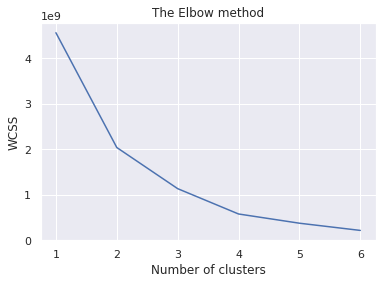

In [39]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [43]:
kmeans = KMeans(6)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
performance_with_clusters = performance_df.copy()
performance_with_clusters['Clusters'] = identified_clusters 

In [44]:
performance_with_clusters.Clusters.value_counts()

0    1849
2     474
5     152
4      17
1       7
3       2
Name: Clusters, dtype: int64

In [56]:
performance_with_clusters.groupby('Clusters').agg({'clicks': [ 'count', 'mean'], 'carts': [ 'mean'], 'orders': ['mean']})

clicks                      carts      orders
          count          mean         mean        mean
Clusters                                              
0          1849    115.829638     2.765279    0.730665
1             7  13232.285714   244.857143   66.285714
2           474   1062.202532    22.221519    6.090717
3             2  27518.000000  1209.000000  137.000000
4            17   7058.588235   153.941176   42.352941
5           152   2481.085526    48.519737   14.631579

#### Majority of products lie in cluster 0, 2 and 5 so let's focus on those.

**Cluster 0**: means clicks and orders both are very low here which means customers are not able to get products from this cluster in search results. 

**Action plan**: Make product description more informative. Include keywords based on analysis done on what query words customer uses 
to search for particular kind of products.

**Cluster 2 and 5**: means clicks are good here still there is scope of product description optimazation in case of cluster_2. Main problem here lies in the fact that customer was at page still not placed order.

**Action plan**: Only 2% of product showed are being added to cart while only 0.5% of clicked products are finally bought. So for products in this clusters target should be to make product more fasinating such as using attractive images. Followed by promting some coupon on products added to cart.


### Observations

In [62]:
unbxd_query_performance_df[unbxd_query_performance_df['ctr']<50]['orders'].value_counts()

0    130
1     20
3      5
2      4
4      2
7      1
5      1
Name: orders, dtype: int64

From above it can be infer that queries for which **ctr** is less than 50 most of the time order will not be placed. Thus outlining the need of better search results.

In [63]:
""" From this it can be observed that following products are not there in search results. 
Reason must be due to N/A product information.
"""

performance_df[(performance_df['orders']==0) & (performance_df['clicks']<100)]

,pId,pName,clicks,carts,orders
1238,CL0029956_OS,Name N/A,99,0,0
1239,CL0032302,Illusion floral applique tulle dress,99,2,0
1240,CL0034964_OS,Name N/A,99,0,0
1241,CL0029240_OS,Name N/A,98,0,0
1242,CL0036074_OS,Name N/A,97,0,0
...,...,...,...,...,...
2474,CL0036157,Mixed media surplice dress,1,0,0
2475,CL0033116_OS,Name N/A,1,0,0
2476,CL0033554_OS,Name N/A,1,0,0
2477,CL0036872,Mosaic border print crepe sundress,1,0,0


In [64]:
combo = performance_df.merge(description_df, how='left', left_on='pId', right_on='PID')

In [65]:
combo.head(2)

,pId,pName,clicks,carts,orders,PID,Product Name,Category,Final Price,Initial Price,Color,Primary Color,Fabric
0,CL0034516,Chevron stripe colorblock maxi dress,29144,2181,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CL0037085,Chevron stripe colorblock maxi dress,25892,237,70,CL0037085,Chevron stripe colorblock maxi dress,Dress,99.95,79.95,Black/white/eggplant,Black,Cotton


In [66]:
combo.Category.value_counts()

 Dress       428
 Top         147
 Skirt        72
 Pant         49
 Jumpsuit     11
 Jacket        9
Name: Category, dtype: int64

In [67]:
combo.Fabric.value_counts()

 Cotton                      263
 Cotton Spandex              139
 Polyester                   104
 Polyester Crepe de Chine     43
 Polyester Spandex            32
 Viscose Spandex              20
 Cotton Polyester             17
 Cotton Polyester Spandex     17
 Rayon Nylon Spandex          12
 Polyamide Spandex            12
 Silk                          7
 Rayon Polyester Spandex       7
 Rayon                         6
 Cotton Nylon                  6
 Cotton Rayon Spandex          4
 Polyester Rayon Spandex       4
 Polyester Nylon               4
 Viscose                       4
 Nylon                         3
 Tencel                        3
 Polyester Rayon               2
 Polyester Metallic            2
 Nylon Polyester               2
 Wool Nylon                    1
 Cotton Linen                  1
 Nylon Cotton                  1
Name: Fabric, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


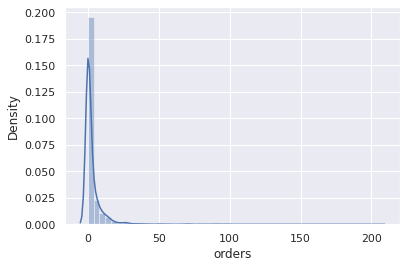

In [68]:
### Distribution plot for no of orders
sns.distplot(performance_df['orders'])

In [69]:
'''
Looks that customer while searching for product use colour in search query. So need to gather colour and texture information of product. To optimize search 
results.
'''
unbxd_query_performance_df['query']

0                           pink 
1                        Chambray
2      gingham in green and white
3                   white dresses
4                            grey
                  ...            
495                  Pleated knit
496                     Contrast 
497                         1940s
498                       crimson
499                   watercolor 
Name: query, Length: 500, dtype: object